In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm

In [2]:
df=pd.read_csv("insurance_data.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


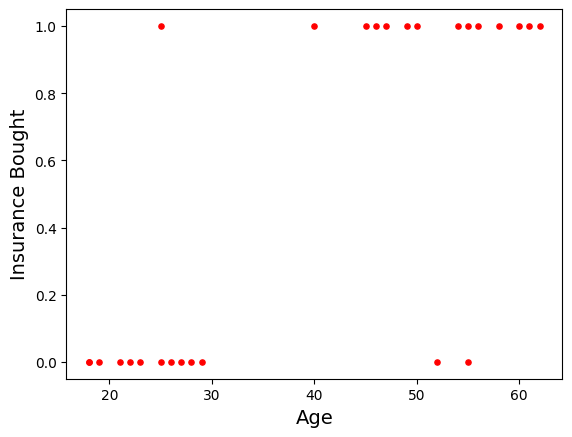

In [4]:
fig,ax=plt.subplots()
ax.scatter(df.age,df.bought_insurance,marker='o',color='r',s=14)
ax.set_xlabel('Age',fontsize=14)
ax.set_ylabel('Insurance Bought',fontsize=14)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train,X_test,Y_train,Y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)
X_test

NameError: name 'df' is not defined

In [11]:
X_train

,age
4,46
8,62
6,55
2,47
25,54
19,18
11,28
15,55
13,29
22,40


### Gradient Descent

In [3]:
df_8=pd.read_csv("H:\Machine Learning\CSV folder\canada_per_capita_income.csv",names=['year','per_capital_income'])
df_8.isna().sum()

year                  0
per_capital_income    0
dtype: int64

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def model(X,Y,L,iterations):
    # total_observation
    m=1
    #No_of_features 
    n=X.shape[0]
    W=np.zeros((n,1))
    b=10000
    cost_list=[]
    for i in range(iterations):
        z=np.dot(W.T,X)+b
        A=sigmoid(z)
        cost=-(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
        dw=(1/m)*np.dot(A-Y,X.T)
        db=(1/m)*np.sum(A-Y)
        W=W-L*dw.T
        b=b-L*db.T
        cost_list.append(cost)
        if(i%(iterations/10)==0):
            print(f"cost after{i} iteration is {cost} ")
    return W,b,cost_list

In [6]:
X_train=df_8.iloc[10:40].year.values
Y_train=df_8.iloc[10:40].per_capital_income.values
iterations=10000
L=0.0005
W,b,cost_list=model(X_train,Y_train,L,iterations)



C:\Users\HP\AppData\Local\Temp\ipykernel_16144\2521376496.py:12: RuntimeWarning: divide by zero encountered in log
  cost=-(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))


cost after0 iteration is -inf 
cost after1000 iteration is -inf 
cost after2000 iteration is -inf 
cost after3000 iteration is -inf 
cost after4000 iteration is -inf 
cost after5000 iteration is -inf 
cost after6000 iteration is -inf 
cost after7000 iteration is -inf 
cost after8000 iteration is -inf 
cost after9000 iteration is -inf 


In [12]:
from sklearn.linear_model import LogisticRegression

In [17]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [18]:
model.predict(X_test)

array([0, 1, 1], dtype=int64)

In [19]:
model.score(X_test,Y_test)

1.0

In [20]:
model.predict_proba(X_test)

array([[0.94033756, 0.05966244],
       [0.1127095 , 0.8872905 ],
       [0.33898145, 0.66101855]])